# McDonalds Data Menu Analysis

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/McDonald%27s_SVG_logo.svg/3000px-McDonald%27s_SVG_logo.svg.png)



This project analyzes the nutritional value of the popular restaurant, McDonalds. Roy Kroc, the former CEO of Mcdonalds was an American business man with the dream of creating a fast food restaurant with consistent high quality food. This dataset provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts. The menu items and nutritional facts were scraped from the McDonald's website.

The McDonald's restaurant has 9 categories in their menu of 260 different items and they are:

Coffee & Tea
Breakfast
Smoothies & Shakes
Chicken & Fish
Beverages
Beef & Pork
Snacks & Sides
Desserts
Salads
Most of McDonald's menu fall under the Coffee and Tea category. The category with the least amount of items is Salads with only 6 items in the Menu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../input/nutrition-facts/menu.csv")
data.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8


In [3]:
data.shape

(260, 24)

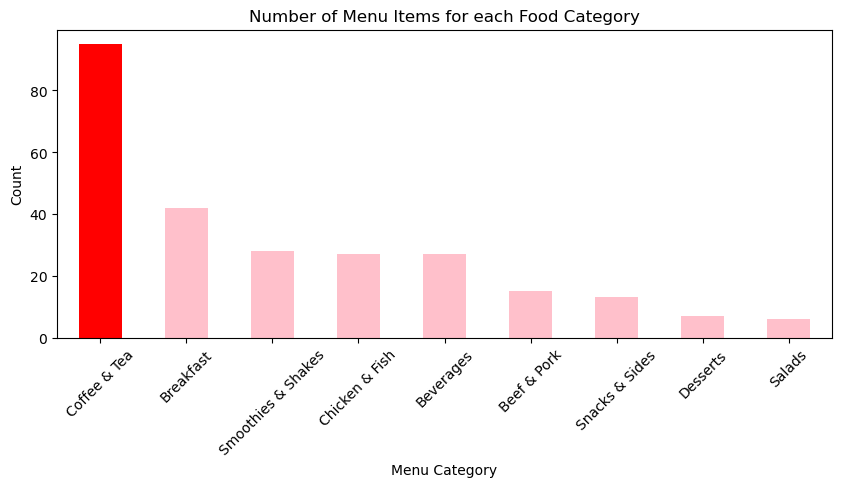

In [4]:
plt.figure(figsize=(10, 4), dpi=100)
menu_category = data.Category.value_counts()
menu_category.plot.bar(color = ['red','pink','pink','pink','pink','pink','pink','pink','pink'])
plt.title("Number of Menu Items for each Food Category")
plt.ylabel("Count")
plt.xlabel("Menu Category")
plt.xticks(rotation=45)
plt.show()

# Fats and Carbohydrates

![](https://s7d1.scene7.com/is/image/mcdonalds/DC_201907_0005_BigMac_832x472:1-3-product-tile-desktop?wid=765&hei=472&dpr=off)

According to the Harvard School of Public Health, instead of promoting foods with low at in calories. It is important to note that healthy fats are not only beneficial but necessary for health. Generally, there is no relationship between the percentage of calories from fat and major health hazard. Fats can be categorized into three:

Unsaturated Fats. These cateory of fats are good for the health and have a lower disease risk. E.g. Vegetable Oil, Fish, Nuts, Seeds etc.

Trans Fats These are bad fats and increase disease risk even when consumed in small quantities

Saturated Fats These are not as harmful as Trans fat bt can be harmful if not taken in moderation. The Dietary Guidlines for America indicates that saturated fat should not be more than 10% of daily calories and the AMA (American Health Association) recommends aiming for a dietary pattern that achieves 5% to 6% of calories from saturated fats.

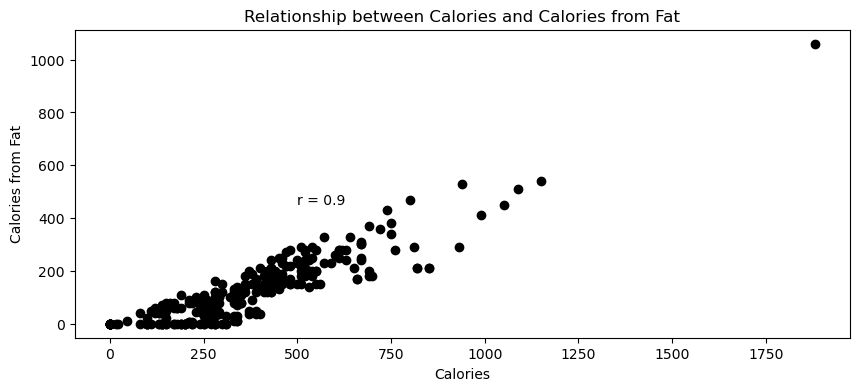

In [5]:
plt.figure(figsize=(10, 4), dpi=100)

correlation = data['Calories'].corr(data['Calories from Fat'])
plt.scatter(data.Calories, data['Calories from Fat'], color='black')
plt.text(500,450,'r = {}'.format(round(correlation,2)))
plt.xlabel("Calories")
plt.ylabel("Calories from Fat")
plt.title("Relationship between Calories and Calories from Fat")
plt.show()

In [6]:
data.groupby('Category')['Trans Fat'].mean() 

Category
Beef & Pork           1.100000
Beverages             0.000000
Breakfast             0.107143
Chicken & Fish        0.129630
Coffee & Tea          0.142105
Desserts              0.000000
Salads                0.000000
Smoothies & Shakes    0.535714
Snacks & Sides        0.000000
Name: Trans Fat, dtype: float64

In [7]:
data['saturated_cholesterol'] = data['Saturated Fat']/data['Cholesterol']*100

In [8]:
saturated_cholesterol = data.groupby('Category')['saturated_cholesterol'].mean().dropna().nlargest(5)

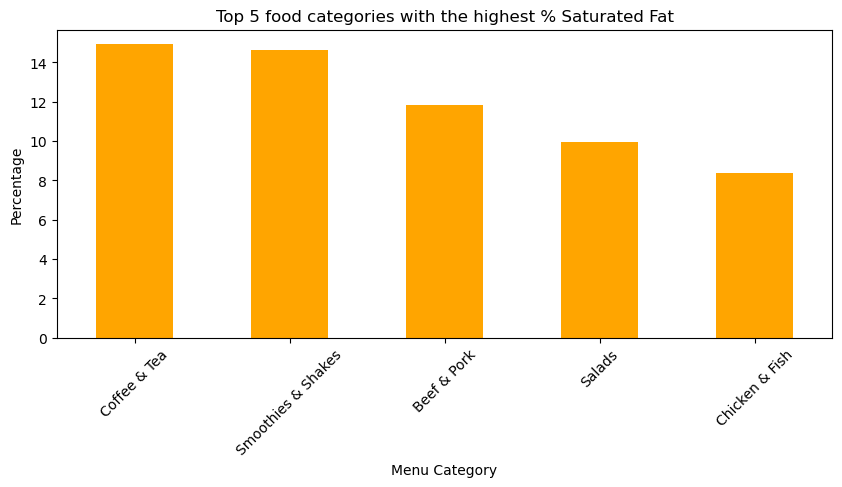

In [9]:
plt.figure(figsize=(10, 4), dpi=100)
saturated_cholesterol.sort_values(ascending=False).plot.bar(color = 'orange')
plt.title("Top 5 food categories with the highest % Saturated Fat")
plt.ylabel("Percentage")
plt.xlabel("Menu Category")
plt.xticks(rotation=45)
plt.show();

In [10]:
coffee_tea = data[data.Category == 'Coffee & Tea']
coffee_tea.groupby('Item')['saturated_cholesterol'].mean().sort_values(ascending=False)

Item
Frappé Chocolate Chip (Small)     21.538462
Frappé Chocolate Chip (Medium)    21.250000
Frappé Chocolate Chip (Large)     21.052632
Hazelnut Iced Coffee (Small)      20.000000
Hazelnut Latte (Medium)           20.000000
                                    ...    
Iced Tea (Small)                        NaN
Sweet Tea (Child)                       NaN
Sweet Tea (Large)                       NaN
Sweet Tea (Medium)                      NaN
Sweet Tea (Small)                       NaN
Name: saturated_cholesterol, Length: 95, dtype: float64

In [11]:
shakes = data[data.Category == 'Smoothies & Shakes']
shakes.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Blueberry Pomegranate Smoothie (Medium)               0.000000
Blueberry Pomegranate Smoothie (Small)                0.000000
Mango Pineapple Smoothie (Medium)                     0.000000
Mango Pineapple Smoothie (Small)                      0.000000
Strawberry Banana Smoothie (Small)                    0.000000
Strawberry Banana Smoothie (Medium)                   0.000000
Blueberry Pomegranate Smoothie (Large)               10.000000
Mango Pineapple Smoothie (Large)                     10.000000
Strawberry Banana Smoothie (Large)                   10.000000
Chocolate Shake (Medium)                             16.000000
Vanilla Shake (Medium)                               16.000000
Shamrock Shake (Medium)                              16.000000
Vanilla Shake (Large)                                16.666667
Strawberry Shake (Small)                             16.666667
Strawberry Shake (Large)                             16.666667
Shamrock Shake (Large)                            

In [12]:
beef_pork = data[data.Category == 'Beef & Pork']
beef_pork.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Hamburger                                    10.000000
McDouble                                     10.666667
Bacon McDouble                               11.111111
Cheeseburger                                 11.111111
Double Cheeseburger                          11.111111
Daily Double                                 11.250000
Jalapeño Double                              11.250000
Big Mac                                      11.764706
Double Quarter Pounder with Cheese           11.875000
Quarter Pounder with Bacon & Cheese          12.380952
Quarter Pounder with Bacon Habanero Ranch    12.380952
Quarter Pounder with Cheese                  12.631579
Quarter Pounder Deluxe                       12.941176
Bacon Clubhouse Burger                       13.043478
McRib                                        14.285714
Name: saturated_cholesterol, dtype: float64

In [13]:
salads = data[data.Category == 'Salads']
salads.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Premium Southwest Salad with Grilled Chicken       3.571429
Premium Bacon Ranch Salad with Grilled Chicken     4.705882
Premium Bacon Ranch Salad with Crispy Chicken      8.571429
Premium Southwest Salad with Crispy Chicken        9.000000
Premium Bacon Ranch Salad (without Chicken)       14.000000
Premium Southwest Salad (without Chicken)         20.000000
Name: saturated_cholesterol, dtype: float64

In [14]:
chicken_fish = data[data.Category == 'Chicken & Fish']
chicken_fish.groupby('Item')['saturated_cholesterol'].mean().sort_values()

Item
Premium Grilled Chicken Classic Sandwich                 3.076923
Premium McWrap Chicken Sweet Chili (Grilled Chicken)     4.615385
Premium Grilled Chicken Ranch BLT Sandwich               5.000000
Southern Style Crispy Chicken Sandwich                   6.666667
Premium Grilled Chicken Club Sandwich                    6.666667
Bacon Clubhouse Grilled Chicken Sandwich                 7.272727
Premium McWrap Chicken & Bacon (Grilled Chicken)         7.368421
Chicken McNuggets (20 piece)                             7.407407
Premium McWrap Chicken & Ranch (Grilled Chicken)         7.500000
Premium McWrap Southwest Chicken (Grilled Chicken)       7.500000
Chicken McNuggets (6 piece)                              7.500000
Chicken McNuggets (40 piece)                             7.547170
Chicken McNuggets (10 piece)                             7.692308
Premium Crispy Chicken Classic Sandwich                  7.777778
Chicken McNuggets (4 piece)                              8.000000
McChi

In [15]:
data.groupby('Category')['Carbohydrates (% Daily Value)'].mean()

Category
Beef & Pork           13.466667
Beverages              9.592593
Breakfast             16.571429
Chicken & Fish        16.333333
Coffee & Tea          14.863158
Desserts              11.571429
Salads                 7.166667
Smoothies & Shakes    30.142857
Snacks & Sides         9.615385
Name: Carbohydrates (% Daily Value), dtype: float64

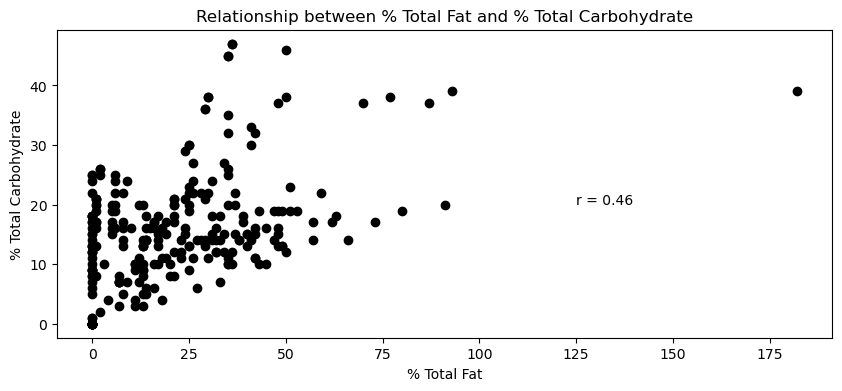

In [16]:
plt.figure(figsize=(10, 4), dpi=100)
plt.scatter(data['Total Fat (% Daily Value)'], data['Carbohydrates (% Daily Value)'], color='k')
correlation = data['Total Fat (% Daily Value)'].corr(data['Carbohydrates (% Daily Value)'])
plt.text(125,20,'r = {}'.format(round(correlation,2)))
plt.xlabel("% Total Fat")
plt.ylabel("% Total Carbohydrate")
plt.title("Relationship between % Total Fat and % Total Carbohydrate")
plt.show()

+ There is a strong relationship between Calories and Calories with fat. Hence, food items with high caloric content tend to also have a high calories with fat content.
<br>

+ Generally, McDonalds foods have low trans fat which is good.
<br>

+ The Smoothies and Shakes Menu Category had the highest saturated fat content. Upon analysis, it was discovered that while Fruit shakes had no saturated fat. However,  milk Shakes, Chocolate Shakes, Shamrock and McFlurry shakes had high saturated fat with McFlurry at the top of the list.
<br>

+ Whereas ordinary tea & coffee have no saturated fat, drinks with mocha, latte and chocolate have a high saturated fat content.

+ All the menus under Beef and Pork have a high %saturated fat content between 10% and 14%.
<br>

+ The Premium Bacon Ranch Salad and Southwest Salad are the only salads with high %saturated fat.
<br>

+ With the exception of McWrap Chicken, most of the food items under the Chicken and Fish menu category have low %saturated fat.
<br>

+ According to Harvard School of Public Health, in an attempt to reduce fat, most food manufacturers replace it with carbohydrate. In view of this, the analysis of the % Total Carbohydrate in Mcdonald's foods was analyzed and it was discovered that on average, Mcdonald's foods are low carbs. Also, there is a weak relationship between carbohydrate and fat in the food items.

# Vitamins & Minerals

![](https://s3.amazonaws.com/dc-hours-lesson-files/wp-content/uploads/2021/02/27161403/VITAMINS-AND-MINERALS.jpg)

In [17]:
data.groupby('Category')['Vitamin A (% Daily Value)'].mean()

Category
Beef & Pork             6.933333
Beverages               0.740741
Breakfast               6.928571
Chicken & Fish         20.444444
Coffee & Tea           10.736842
Desserts                5.142857
Salads                146.666667
Smoothies & Shakes     18.750000
Snacks & Sides          4.846154
Name: Vitamin A (% Daily Value), dtype: float64

In [18]:
data.groupby('Category')['Vitamin C (% Daily Value)'].mean()

Category
Beef & Pork            7.333333
Beverages             23.481481
Breakfast              8.904762
Chicken & Fish        12.629630
Coffee & Tea           0.000000
Desserts               4.142857
Salads                28.333333
Smoothies & Shakes     6.964286
Snacks & Sides        28.153846
Name: Vitamin C (% Daily Value), dtype: float64

In [19]:
beverage = data[data.Category == 'Beverages']
beverage.groupby('Item')['Vitamin C (% Daily Value)'].mean().sort_values()

Item
Diet Dr Pepper (Small)                 0.0
Sprite (Large)                         0.0
Sprite (Child)                         0.0
Fat Free Chocolate Milk Jug            0.0
Dr Pepper (Small)                      0.0
Dr Pepper (Medium)                     0.0
Dr Pepper (Large)                      0.0
Dr Pepper (Child)                      0.0
Sprite (Medium)                        0.0
Diet Dr Pepper (Medium)                0.0
Diet Dr Pepper (Large)                 0.0
Sprite (Small)                         0.0
Diet Coke (Small)                      0.0
Diet Coke (Medium)                     0.0
Diet Coke (Large)                      0.0
Diet Coke (Child)                      0.0
Dasani Water Bottle                    0.0
Coca-Cola Classic (Small)              0.0
Coca-Cola Classic (Medium)             0.0
Coca-Cola Classic (Large)              0.0
Coca-Cola Classic (Child)              0.0
Diet Dr Pepper (Child)                 0.0
1% Low Fat Milk Jug                    4.0
Minute

+ Vitamin A is an essential vitamin because it protects the eyes, lowers risk of diseases by supporting the immune system, promotes healthy growth etc. Of all the food categories, the Salad category has the highest amount of Vitamin A followed by Chicken & Fish, Smoothies & Shakes.
<br>

+ Vitamin C is also an essential vitamin useful for boosting immunity, managing high blood pressure etc. Mcdonald's foods are richer in Vitamin A than in Vitamin C. Salads, Snacks and Sides and Beverages are the food categories with the highest amount of Vitamin C. 
<br>

+ Apple Slices have the highest amount of Vitamin C in the Snacks category. The Mcdonald's french fries are also rich in Vitamin C because Potato is a rich source of Vitamin C.
<br>

+ For the beverage category, with the exception of Apple and Orange Juices which are very rich in Vitamin C, all the other beverages & drinks (e.g. Coke, Sprite) are very low in Vitamins

In [20]:
iron = data.groupby('Category')['Iron (% Daily Value)'].mean()
calcium = data.groupby('Category')['Calcium (% Daily Value)'].mean()

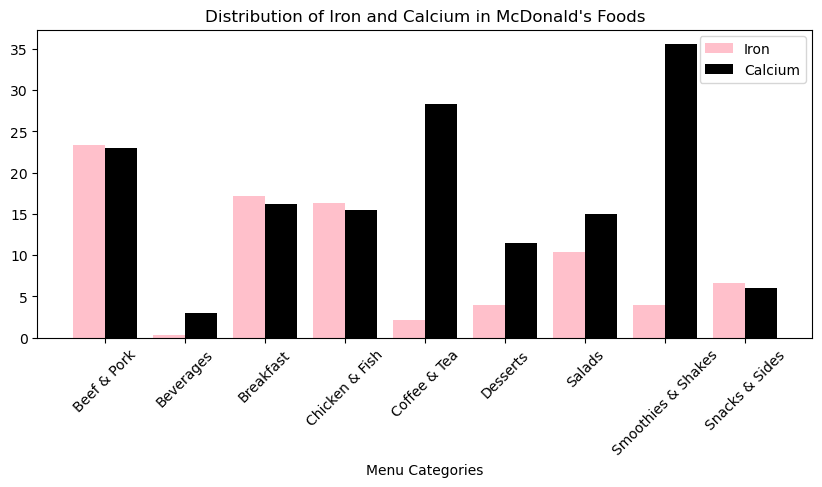

In [21]:
plt.figure(figsize=(10, 4), dpi=100)

category = iron.index
Iron = iron.values
Calcium = calcium.values

X_axis = np.arange(len(category))

plt.bar(X_axis - 0.2, Iron, 0.4, label = 'Iron', color = 'pink')
plt.bar(X_axis + 0.2, Calcium, 0.4, label = 'Calcium', color = 'black')

plt.xticks(X_axis, category)
plt.xlabel("Menu Categories")
plt.title("Distribution of Iron and Calcium in McDonald's Foods")
plt.xticks(rotation=45)
plt.legend()
plt.show()

+ Shakes (fruit shakes, milk shakes etc.), coffee and tea are rich in calcium but low in iron
<br>

+ Menu categories rich in Animal protein (Beef & Pork, Chicken & Fish) are rich in both Iron and Calcium
<br>

+ Mcdonald's beverages are very low in Calcium and Iron.

# Summary

This analysis provides a walkthrough the McDonald's Menu list and the nutritional value of each food category in the list. Based on this analysis, you can decide which food to opt for depending on your preference or nutritional needs. 

A lot of  Mcdonald's foods are rich in Vitamins (Vitamin A & C) especially Salads. Also, most foods are low in carbohydrates with little or no trans-fat which is a plus. However, a lot of foods are high in Saturated fat, hence, it is important to check for foods with low Saturated fat (>10%) in case you are cutting down on your fat intake.The analysis also covers essential minerals such as Calcium and Iron and it was noted that foods in the menu containing milk or animal protein are very rich in calcium.